<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [3]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

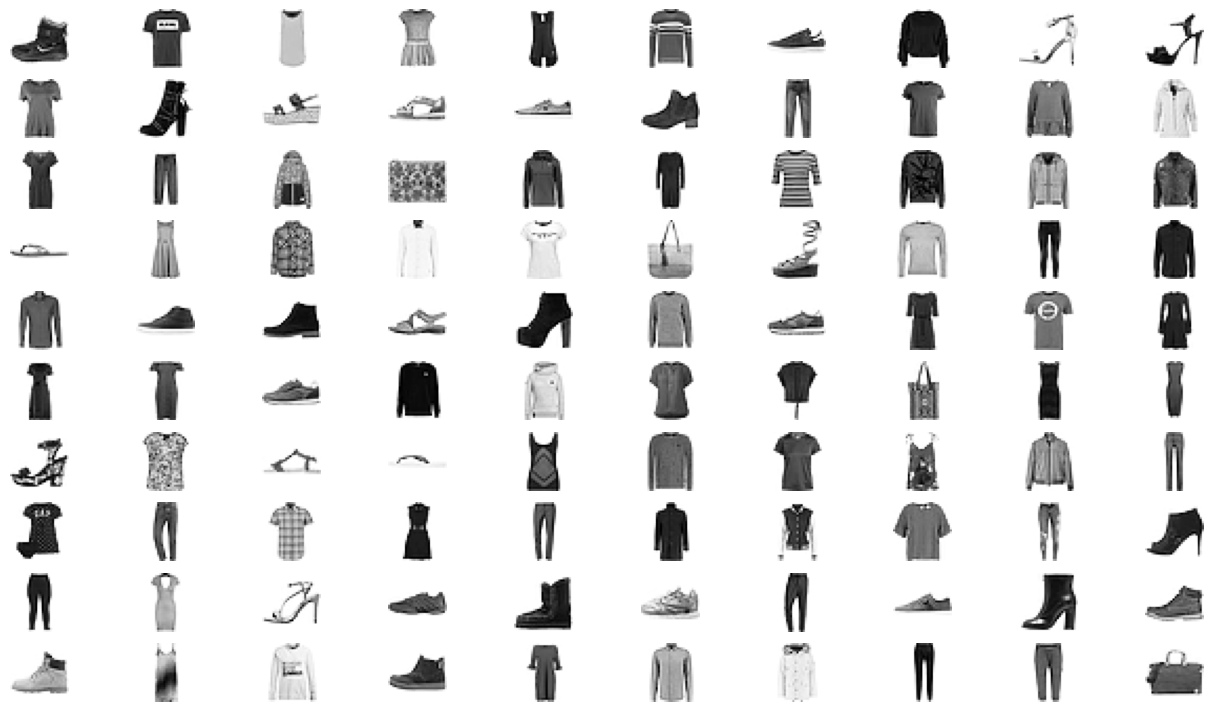

In [4]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

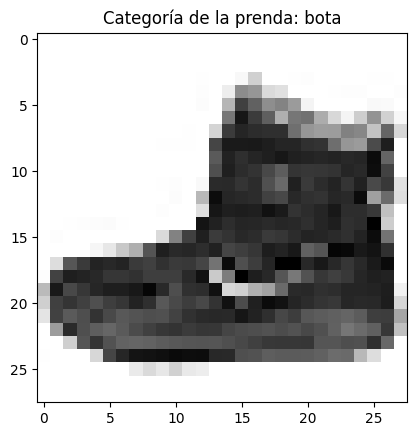

In [5]:
# Alumno, dibuje la primera imagen y su correspondiente categoria

plt.imshow(data_X_train[0], cmap= "Greys")
plt.title("Categoría de la prenda: " + str(category_list[int(data_y_train[0])]))
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)

print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [7]:
# Alumno: Normalizar los datos entre 0 y 1

X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

print(X_train_norm[0][14, :])

[0.         0.         0.00392157 0.01568627 0.02352941 0.02745098
 0.00784314 0.         0.         0.         0.         0.
 0.92941176 0.88627451 0.85098039 0.8745098  0.87058824 0.85882353
 0.87058824 0.86666667 0.84705882 0.8745098  0.89803922 0.84313725
 0.85490196 1.         0.30196078 0.        ]


In [8]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)

print("Cantidad de datos en observación: ", X_train_norm.shape[0])

Cantidad de datos en observación:  60000


In [9]:
# Alumno: Imprimir la dimension de la imagen

print("Dimensión de la imagen:", X_train_norm[0].shape, "pixels")

Dimensión de la imagen: (28, 28) pixels


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

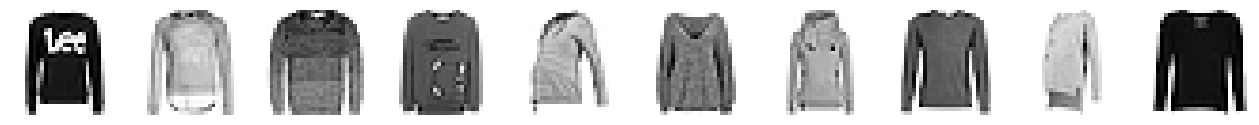

In [10]:
# Alumno: Explorar los primeros diez puloveres del dataset de train

fig = plt.figure(figsize=(16, 9))

c = 0
for i in range(10):
  ax = fig.add_subplot(1, 10, i+1)
  ax.axis("off")

  while True:
    if data_y_test[c] == category_list.index("pulover"):
      ax.imshow(X_test_norm[c], cmap = "Greys")
      c += 1
      break
    c += 1
plt.show()


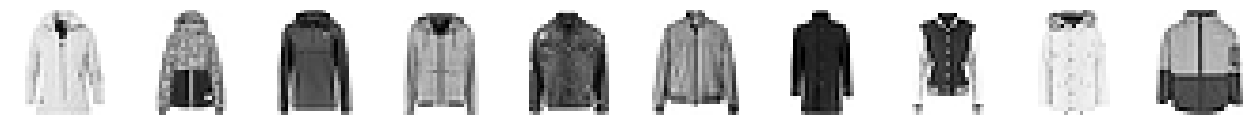

In [11]:
# Alumno: Explorar los primeros diez sacos del dataset de train

fig = plt.figure(figsize=(16, 9))

c = 0
for i in range(10):
  ax = fig.add_subplot(1, 10, i+1)
  ax.axis("off")

  while True:
    if data_y_train[c] == category_list.index("saco"):
      ax.imshow(X_train_norm[c], cmap = "Greys")
      c += 1
      break
    c += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [12]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension

num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype("float32")
X_test =  X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype("float32")


<function matplotlib.pyplot.show(close=None, block=None)>

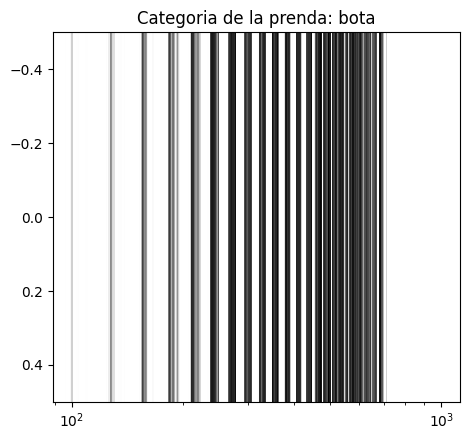

In [13]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X_train[0].reshape(-1, 1).T, cmap= "Greys")
ax.set_xscale("log")
plt.title("Categoria de la prenda: " + str(category_list[int(data_y_train[0])]))
plt.show

In [14]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [15]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [16]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test

y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [18]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [19]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion

model = Sequential()

model.add(Dense(units=64, activation= "relu", input_shape=(in_shape,)))

model.add(Dense(units=64, activation= "relu"))
model.add(Dense(units=64, activation= "relu"))

model.add(Dense(units=out_shape, activation= "softmax"))

model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 59210 (231.29 KB)
Trainable params: 59210 (231.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 0.6352 - accuracy: 0.7754 - val_loss: 0.4509 - val_accuracy: 0.8403
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4218 - accuracy: 0.8500 - val_loss: 0.3921 - val_accuracy: 0.8600
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3764 - accuracy: 0.8651 - val_loss: 0.3904 - val_accuracy: 0.8608
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3469 - accuracy: 0.8730 - val_loss: 0.3797 - val_accuracy: 0.8610
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3267 - accuracy: 0.8801 - val_loss: 0.3601 - val_accuracy: 0.8709
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3104 - accuracy: 0.8870 - val_loss: 0.3562 - val_accuracy: 0.8702
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2956 - accuracy: 0.8905 - val_loss: 0.3473 - val_accuracy: 0.8737
Epoch 

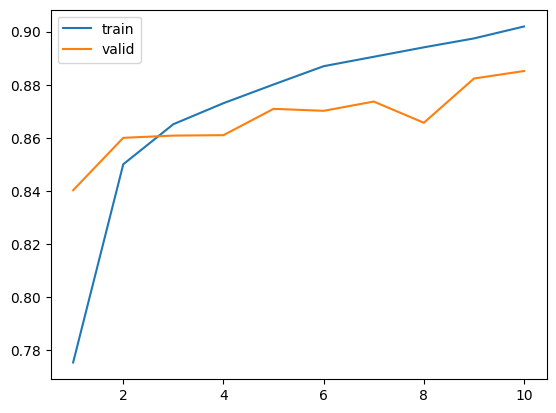

In [21]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [22]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

model.add(Dense(units=64, activation="relu", input_shape=(in_shape,)))

model.add(Dense(units=64, activation= "relu"))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=64, activation= "relu"))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=out_shape, activation= "softmax"))

model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 59210 (231.29 KB)
Trainable params: 5921

In [23]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 6s 10ms/step - loss: 0.7721 - accuracy: 0.7280 - val_loss: 0.4634 - val_accuracy: 0.8351
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4760 - accuracy: 0.8340 - val_loss: 0.4059 - val_accuracy: 0.8528
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.4187 - accuracy: 0.8514 - val_loss: 0.3949 - val_accuracy: 0.8569
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3907 - accuracy: 0.8615 - val_loss: 0.3663 - val_accuracy: 0.8659
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3688 - accuracy: 0.8665 - val_loss: 0.3606 - val_accuracy: 0.8688
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3503 - accuracy: 0.8733 - val_loss: 0.3484 - val_accuracy: 0.8741
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3367 - accuracy: 0.8788 - val_loss: 0.3418 - val_accuracy: 0.8783
Epoch

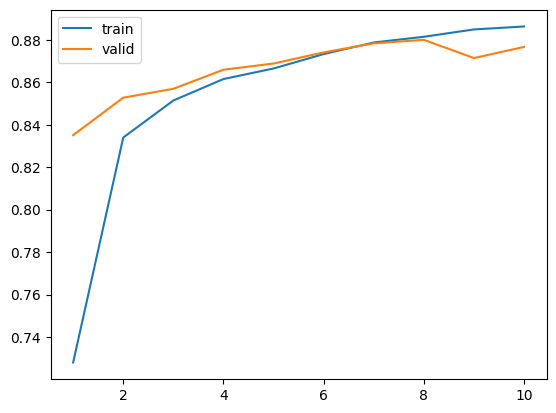

In [24]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [25]:
# Alumno: Predecir las probabilidades del dataset X_test

y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

313/313 [==============================] - 1s 2ms/step


array([[1.1076291e-05, 1.3313180e-05, 1.1761165e-06, 2.4541262e-06,
        2.9722392e-07, 5.5240304e-03, 8.4590988e-07, 2.4156891e-02,
        5.6111548e-05, 9.7023386e-01],
       [5.8469541e-05, 2.6566569e-08, 9.8863709e-01, 2.1247522e-06,
        1.2686702e-03, 2.7050251e-10, 1.0033414e-02, 1.2151264e-11,
        2.2283366e-07, 7.9013174e-10],
       [1.6627470e-10, 9.9999994e-01, 1.4639181e-12, 1.1044097e-09,
        9.5166756e-12, 3.9784186e-18, 4.6119057e-14, 1.7729268e-15,
        2.6649542e-14, 2.0349641e-14]], dtype=float32)

In [26]:
# Alumno: Transformar las probabilidades en y_hat usando argmax

y_hat = np.argmax(y_hat_prob, axis=1)
y_hat[:3]

array([9, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [27]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)

scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8697


0.869700014591217

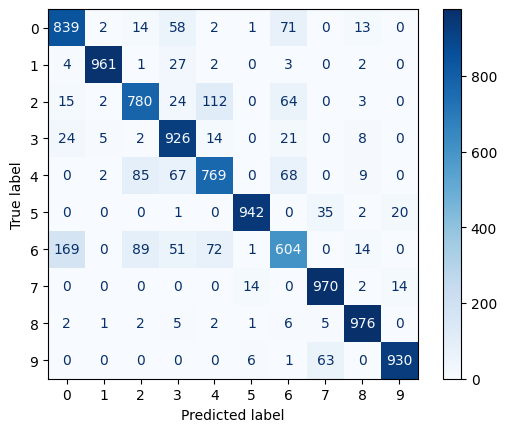

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [29]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [30]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco

X_test_peores = X_test[rank_saco]

y_test_peores = y_test[rank_saco]

In [31]:
# Alumno: Calcular la exactitud de los sacos seleccionados

score = model.evaluate(X_test_peores, y_test_peores)
score[1]

1/1 [==============================] - 0s 33ms/step - loss: 2.3315 - accuracy: 0.0000e+00


0.0

In [32]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)

y_hat_prob_peores = model.predict(X_test_peores)

y_hat_peores = np.argmax(y_hat_prob_peores, axis=1)
y_hat_peores

1/1 [==============================] - 0s 28ms/step


array([2, 2, 2, 6, 2, 2, 2, 2, 2, 2])

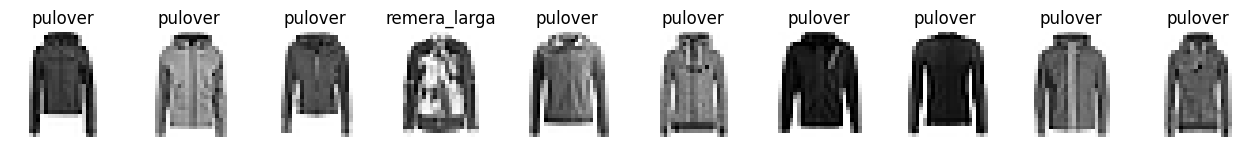

In [33]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16, 9))

c = 0

for i in rank_saco:
  ax = fig.add_subplot(1, 10, c+1)
  ax.axis("off")
  ax.imshow(X_test_norm[i], cmap="Greys")
  ax.set_title(category_list[y_hat_peores[c]])
  c += 1
plt.show()



# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)